In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/ASTRO_IMAGING_HST_OPTICAL17.csv
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/summary.txt
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_07909_rb_wfpc2_f606w_pc_drz.fits
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_07909_rb_wfpc2_f606w_wf_drz.fits
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_09598_3a_wfpc2_f656n_pc_drz.fits
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_09676_x8_wfpc2_f606w_pc_drz.fits
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/HST-OPTICAL/hst_09244_9m_wfpc2_f606w_pc_drz.fits
/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SOMBRERO/ASTRO_IMAGING_HST_OPTICAL8.csv
/kagg

# Using only 5 files for analysis and prediction

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SAGITTARIUS-A/ASTRO_IMAGING_HST_OPTICAL17.csv')
df_2 = pd.read_csv(r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/SOMBRERO/ASTRO_IMAGING_HST_OPTICAL8.csv')
df_3 = pd.read_csv(r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/CENTAURUS-A/ASTRO_IMAGING_HST_OPTICAL13.csv')
df_4 = pd.read_csv (r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/H1821/ASTRO_IMAGING_HST_OPTICAL5.csv')
df_5 = pd.read_csv(r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/NGC5548/ASTRO_IMAGING_HST_OPTICAL12.csv')
df_6 = pd.read_csv(r'/kaggle/input/space-objects-around-black-holes-esa/NEAR THE BLACK HOLE/H1821/ASTRO_IMAGING_HST_OPTICAL5.csv')

In [3]:
df.head()

,postcard_url,product_url,observation_id,ra_deg,dec_deg,target_name,instrument_name,collection,filter,start_time,exposure_duration,stc_s,end_time,observation_oid
0,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_07909_rb_wfpc2_f606w_pc,266.275245,-28.941184,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.275620000000004 -28.94818200...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_pc
1,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09676_x8_wfpc2_f606w_pc,266.275913,-28.944096,ANY,WFPC2,HLA,F606W,2003-03-13 20:26:17.25,1100.0,POLYGON J2000 266.27582799999999 -28.951051000...,2003-03-13 20:47:17.24,hst_09676_x8_wfpc2_f606w_pc
2,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09598_3a_wfpc2_f656n_pc,266.276156,-28.943571,EARTH-CALIB,WFPC2,HLA,F656N,2003-03-13 21:16:17.11,0.7,POLYGON J2000 266.267831000000001 -28.95085500...,2003-03-13 21:18:17.47,hst_09598_3a_wfpc2_f656n_pc
3,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09244_9m_wfpc2_f606w_pc,266.279368,-28.944208,ANY,WFPC2,HLA,F606W,2001-03-22 16:03:14.86,2500.0,POLYGON J2000 266.279143999999917 -28.95116100...,2001-03-22 16:47:14.86,hst_09244_9m_wfpc2_f606w_pc
4,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_07909_rb_wfpc2_f606w_wf,266.265018,-28.941840,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.269665999999972 -28.97094800...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_wf


# Merging 5 files together in one dataframe

In [4]:
frames = [df, df_2, df_3, df_4, df_5, df_5, df_6]
result = pd.concat(frames)

In [5]:
result.head()

,postcard_url,product_url,observation_id,ra_deg,dec_deg,target_name,instrument_name,collection,filter,start_time,exposure_duration,stc_s,end_time,observation_oid
0,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_07909_rb_wfpc2_f606w_pc,266.275245,-28.941184,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.275620000000004 -28.94818200...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_pc
1,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09676_x8_wfpc2_f606w_pc,266.275913,-28.944096,ANY,WFPC2,HLA,F606W,2003-03-13 20:26:17.25,1100.0,POLYGON J2000 266.27582799999999 -28.951051000...,2003-03-13 20:47:17.24,hst_09676_x8_wfpc2_f606w_pc
2,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09598_3a_wfpc2_f656n_pc,266.276156,-28.943571,EARTH-CALIB,WFPC2,HLA,F656N,2003-03-13 21:16:17.11,0.7,POLYGON J2000 266.267831000000001 -28.95085500...,2003-03-13 21:18:17.47,hst_09598_3a_wfpc2_f656n_pc
3,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_09244_9m_wfpc2_f606w_pc,266.279368,-28.944208,ANY,WFPC2,HLA,F606W,2001-03-22 16:03:14.86,2500.0,POLYGON J2000 266.279143999999917 -28.95116100...,2001-03-22 16:47:14.86,hst_09244_9m_wfpc2_f606w_pc
4,http://archives.esac.esa.int/ehst-sl-server/se...,http://archives.esac.esa.int/ehst-sl-server/se...,hst_07909_rb_wfpc2_f606w_wf,266.265018,-28.941840,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.269665999999972 -28.97094800...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_wf


# Dropping irrelevant columns and encoding categorical columns

In [6]:
# We drop irrelavant columns 
result.drop(['product_url'],axis=1, inplace=True)
result.drop(['postcard_url'], axis=1, inplace=True)
result.drop(['observation_id'], axis=1, inplace=True)

In [7]:
result.head()

,ra_deg,dec_deg,target_name,instrument_name,collection,filter,start_time,exposure_duration,stc_s,end_time,observation_oid
0,266.275245,-28.941184,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.275620000000004 -28.94818200...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_pc
1,266.275913,-28.944096,ANY,WFPC2,HLA,F606W,2003-03-13 20:26:17.25,1100.0,POLYGON J2000 266.27582799999999 -28.951051000...,2003-03-13 20:47:17.24,hst_09676_x8_wfpc2_f606w_pc
2,266.276156,-28.943571,EARTH-CALIB,WFPC2,HLA,F656N,2003-03-13 21:16:17.11,0.7,POLYGON J2000 266.267831000000001 -28.95085500...,2003-03-13 21:18:17.47,hst_09598_3a_wfpc2_f656n_pc
3,266.279368,-28.944208,ANY,WFPC2,HLA,F606W,2001-03-22 16:03:14.86,2500.0,POLYGON J2000 266.279143999999917 -28.95116100...,2001-03-22 16:47:14.86,hst_09244_9m_wfpc2_f606w_pc
4,266.265018,-28.941840,ANY,WFPC2,HLA,F606W,1998-08-13 11:59:14.11,2200.0,POLYGON J2000 266.269665999999972 -28.97094800...,1998-08-13 12:38:14.11,hst_07909_rb_wfpc2_f606w_wf


In [8]:
# we use label encoding

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column instrument_name	collection	filter	.
result['target_name']= label_encoder.fit_transform(result['target_name'])
result['instrument_name']= label_encoder.fit_transform(result['instrument_name'])
result['collection']= label_encoder.fit_transform(result['collection'])
result['filter']= label_encoder.fit_transform(result['filter'])
result['observation_oid']= label_encoder.fit_transform(result['observation_oid'])
result['stc_s']= label_encoder.fit_transform(result['stc_s'])

# Checking time difference between space event start and end date and the avarage time difference 

In [9]:
result['start_time'] = pd.to_datetime(result['start_time'])
result['end_time'] = pd.to_datetime(result['end_time'])

In [10]:
# we now calculate the average difference between Order_Purchased and Recieved_by_customer
timediff = result['start_time'] - result['end_time']
timediff.apply(lambda x: (x.total_seconds())/3600).mean()

-0.2615118464052288

In [11]:
result['time_diff'] = timediff.apply(lambda x: (x.total_seconds())/3600)

In [12]:
# checking summry of data after transformations
result.head()

,ra_deg,dec_deg,target_name,instrument_name,collection,filter,start_time,exposure_duration,stc_s,end_time,observation_oid,time_diff
0,266.275245,-28.941184,0,4,0,6,1998-08-13 11:59:14.110,2200.0,20,1998-08-13 12:38:14.110,2,-0.650000
1,266.275913,-28.944096,0,4,0,6,2003-03-13 20:26:17.250,1100.0,21,2003-03-13 20:47:17.240,7,-0.349997
2,266.276156,-28.943571,1,4,0,7,2003-03-13 21:16:17.110,0.7,18,2003-03-13 21:18:17.470,6,-0.033433
3,266.279368,-28.944208,0,4,0,6,2001-03-22 16:03:14.860,2500.0,22,2001-03-22 16:47:14.860,5,-0.733333
4,266.265018,-28.941840,0,4,0,6,1998-08-13 11:59:14.110,2200.0,19,1998-08-13 12:38:14.110,3,-0.650000


# EDA

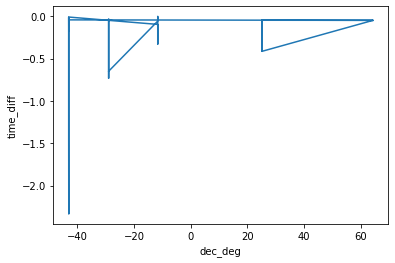

In [13]:
from matplotlib import pyplot as plt
x = result['dec_deg']
y = result['time_diff']
plt.xlabel("dec_deg")
plt.ylabel("time_diff")
plt.plot(x,y)
plt.show();

Most observed Aestroids near to earth have almost no time difference in observation showing we havent been able to spot them near enough in time due to limited observatories globally

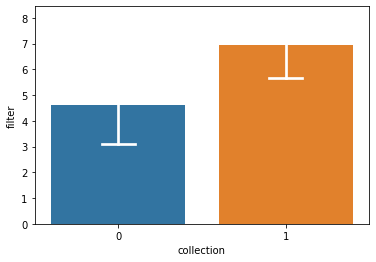

In [14]:
# USING BARPLOT WITH SEABORN LIBRARY,it also shows errors calulcated throughits error bars here 
import seaborn as sns
ax = sns.barplot(x = 'collection', y = 'filter', errcolor='w', capsize=0.2, data=result);

Most filters lie in the collection - 1, Implying most observations(1) were done due to using increasing filters on advanced telescopy

# Model Building - nueral network regression

In [15]:
# we drop the start and end time as we now have the time difference 
result.drop(['end_time'],axis=1, inplace=True)
result.drop(['start_time'], axis=1, inplace=True)

In [16]:
# we check the statistical summary
result.describe()

,ra_deg,dec_deg,target_name,instrument_name,collection,filter,exposure_duration,stc_s,observation_oid,time_diff
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,227.995765,3.725337,3.941176,3.147059,0.705882,6.264706,603.046246,14.617647,13.970588,-0.261512
std,36.087596,40.702111,2.984213,1.438272,0.462497,3.008159,1060.543208,8.000056,7.469069,0.468904
min,189.995831,-43.039392,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,-2.333333
25%,201.351845,-28.943965,2.000000,3.000000,0.000000,4.250000,2.700000,8.250000,8.250000,-0.311381
50%,214.498203,-11.623016,3.000000,3.000000,1.000000,6.500000,55.000000,15.500000,15.000000,-0.049947
75%,266.278565,25.136791,5.750000,4.000000,1.000000,9.000000,669.500000,21.750000,19.000000,-0.049494
max,275.488488,64.343397,9.000000,6.000000,1.000000,9.000000,5000.000000,26.000000,26.000000,-0.002778


<AxesSubplot:>

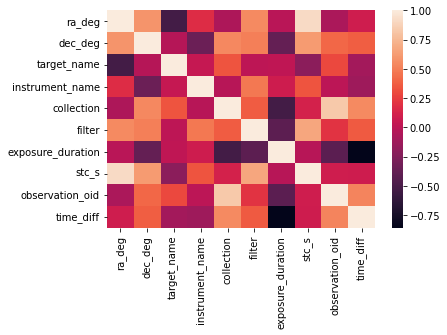

In [17]:
sns.heatmap(result.corr())

we can see that correlations between variables are relatively strong in crossing 0.25 on average 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import time #helper libraries

In [19]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [20]:

from sklearn.model_selection import train_test_split
# create dataset
X =  result['target_name']
y = result.drop(['target_name'], axis=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [21]:
def scale_datasets(x_train, x_test):
    
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
    return x_train_scaled, x_test_scaled

In [22]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

2022-04-29 20:38:33.195627: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

2022-04-29 20:38:33.454407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 8.8249 - mean_squared_logarithmic_error: 8.8249 - val_loss: 5.1018 - val_mean_squared_logarithmic_error: 5.1018
Epoch 2/10
1/1 [==============================] - 0s 55ms/step - loss: 6.7972 - mean_squared_logarithmic_error: 6.7972 - val_loss: 3.5662 - val_mean_squared_logarithmic_error: 3.5662
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 4.9961 - mean_squared_logarithmic_error: 4.9961 - val_loss: 4.2612 - val_mean_squared_logarithmic_error: 4.2612
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 4.4811 - mean_squared_logarithmic_error: 4.4811 - val_loss: 5.4810 - val_mean_squared_logarithmic_error: 5.4810
Epoch 5/10
1/1 [==============================] - 0s 55ms/step - loss: 4.8022 - mean_squared_logarithmic_error: 4.8022 - val_loss: 5.8772 - val_mean_squared_logarithmic_error: 5.8772
Epoch 6/10
1/1 [==============================] - 0s 54ms/step - loss: 5.0738 - mean_sq

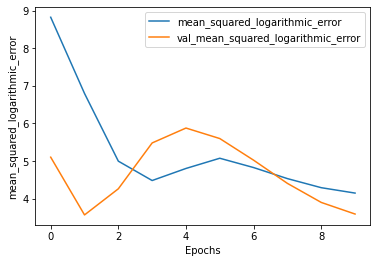

In [24]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

We can see that as epochs increases the loss decreases

In [25]:
X_test['prediction'] = model.predict(X_test)

In [26]:
X_test.count()

8